Segunda entrega de proyecto de procesamiento de datos

Kamilt Andres Bejarano Diaz

Ingenieria de sistemas

Profesor:
John Jairo Corredor Franco

In [0]:
import pandas as pd

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Cargar los datos de accidentes viales
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url_accidentes)

In [0]:
# URL del archivo CSV en GitHub
url_violations = "https://raw.githubusercontent.com/K1000T/archivos/main/Motor_Vehicle_Crashes_-_Violation_Information__Three_Year_Window.csv"

# Cargar los datos en un DataFrame
df_violations = pd.read_csv(url_violations)

# Ver las primeras filas del DataFrame
print(df_violations.head())


   Year         Violation Description Violation Code  Case Individual ID
0  2020  OPERATING W/O INSURANCE INF.          3191U            23540381
1  2020  OPERATING W/O INSURANCE INF.          3191U            23540411
2  2020           UNLICENSED OPERATOR           5091            23540437
3  2020      DISOBEYED TRAFFIC DEVICE          1110A            23540437
4  2020          FAILED TO KEEP RIGHT          1120A            23540571


In [0]:
#Mostrar las primeras filas de cada DataFrame
print(df_arrestos.head())
print(df_accidentes.head())

   ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   261249590  01/02/2023  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
1   261271301  01/03/2023  105.0               STRANGULATION 1ST  106.0   
2   262235280  01/20/2023  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3   264404265  03/01/2023  101.0                       ASSAULT 3  344.0   
4   264443630  03/02/2023  808.0                         TAX LAW  125.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0                6                  0     25-4

Filtros y transformaciones: en este apartado se espera que se presenten las transformaciones finales y
filtros aplicados sobre los datos que se vienen trabajando, se espera que se realicen al menos 2 filtros
y 3 transformaciones., como tambien la justificación de estos procedimientos.

In [0]:
# Cargar los datos de violaciones de tráfico
df_violations = pd.read_csv(url_violations)

# Filtros y transformaciones en el DataFrame de violaciones
# 1. Filtrar violaciones relacionadas con el exceso de velocidad
df_violaciones_velocidad = df_violations[df_violations['Violation Description'].str.contains("SPEED", case=False, na=False)]

# 2. Transformación: Contar la cantidad de violaciones por año
conteo_violaciones_por_anio = df_violations['Year'].value_counts().reset_index()
conteo_violaciones_por_anio.columns = ['Año', 'Cantidad de Violaciones']

# Justificación de los procedimientos:
# - El filtro se aplica para identificar las violaciones relacionadas con el exceso de velocidad.
# - La transformación cuenta la cantidad de violaciones por año, lo que puede ser útil para análisis temporales.

# Mostrar los primeros registros del DataFrame de violaciones relacionadas con exceso de velocidad
print("Primeros registros del DataFrame de violaciones relacionadas con exceso de velocidad:")
print(df_violaciones_velocidad.head())
print("\nConteo de violaciones por año:")
print(conteo_violaciones_por_anio)

Primeros registros del DataFrame de violaciones relacionadas con exceso de velocidad:
    Year           Violation Description Violation Code  Case Individual ID
20  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540628
24  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540634
40  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540703
44  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540721
53  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540773

Conteo de violaciones por año:
    Año  Cantidad de Violaciones
0  2019                   120600
1  2018                   117444
2  2022                   113558
3  2021                   110582
4  2020                    94314


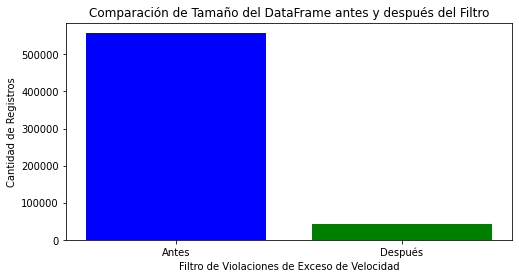

Primeros registros del DataFrame de violaciones relacionadas con exceso de velocidad:
    Year           Violation Description Violation Code  Case Individual ID
20  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540628
24  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540634
40  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540703
44  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540721
53  2020  SPEED NOT REASONABLE & PRUDENT          1180A            23540773


In [0]:
import matplotlib.pyplot as plt

# Comparación: Tamaño del DataFrame antes y después del filtro
tamanio_antes = len(df_violations)
tamanio_despues = len(df_violaciones_velocidad)

# Crear una figura para la comparación
plt.figure(figsize=(8, 4))

# Gráfico de barras para mostrar el tamaño antes y después del filtro
plt.bar(['Antes', 'Después'], [tamanio_antes, tamanio_despues], color=['blue', 'green'])
plt.xlabel('Filtro de Violaciones de Exceso de Velocidad')
plt.ylabel('Cantidad de Registros')
plt.title('Comparación de Tamaño del DataFrame antes y después del Filtro')

# Mostrar el gráfico
plt.show()

# mostrar las primeras filas del DataFrame filtrado
print("Primeros registros del DataFrame de violaciones relacionadas con exceso de velocidad:")
print(df_violaciones_velocidad.head())

In [0]:
# Aplicar filtro de Categoría del Delito a los datos de arrestos
df_arrestos_filtrados = df_arrestos[df_arrestos['OFNS_DESC'].isin(['Robo', 'Agresión'])]

# Aplicar filtro de Ubicación a los datos de arrestos (por ejemplo, seleccionar datos de un distrito)
# Cambia 'Bronx' al distrito de tu elección
df_arrestos_ubicacion = df_arrestos[df_arrestos['ARREST_BORO'] == 'Bronx']

# Transformación de Edades en valores numéricos
# Reemplaza 'AGE_GROUP' con el nombre de la columna de edades en tus datos
df_arrestos['AGE_GROUP'] = df_arrestos['AGE_GROUP'].astype(str).str.extract('(\d+)').astype(float).fillna(0)

# Transformación de Fecha para extraer el día de la semana
df_arrestos['ARREST_DATE'] = pd.to_datetime(df_arrestos['ARREST_DATE'])
df_arrestos['DIA_DE_LA_SEMANA'] = df_arrestos['ARREST_DATE'].dt.day_name()

# Agregar datos de arrestos por categoría de delito
arrestos_por_categoria = df_arrestos.groupby('OFNS_DESC').size().reset_index(name='TOTAL_ARRESTOS')

# Aplicar filtro por gravedad a los datos de accidentes viales
df_accidentes_filtrados = df_accidentes[(df_accidentes['NUMBER OF PERSONS INJURED'] > 0) | (df_accidentes['NUMBER OF PERSONS KILLED'] > 0)]

# Aplicar filtro por hora del día a los datos de accidentes viales
# Por ejemplo, seleccionar accidentes ocurridos durante las horas pico (7:00 AM - 9:00 AM)
df_accidentes_hora_pico = df_accidentes[(df_accidentes['CRASH TIME'] >= '07:00:00') & (df_accidentes['CRASH TIME'] <= '09:00:00')]

# Transformación de Factores Contribuyentes en una descripción
df_accidentes['FACTOR_CONTRIBUYENTE'] = df_accidentes[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Agregar datos de accidentes viales por ubicación (por ejemplo, intersección)
accidentes_por_ubicacion = df_accidentes.groupby('ON STREET NAME').size().reset_index(name='TOTAL_ACCIDENTES')

In [0]:
# Verificar los primeros 5 registros de df_arrestos_filtrados
print(df_arrestos_filtrados.head())

# Verificar los primeros 5 registros de df_accidentes_filtrados
print(df_accidentes_filtrados.head())

Empty DataFrame
Columns: [ARREST_KEY, ARREST_DATE, PD_CD, PD_DESC, KY_CD, OFNS_DESC, LAW_CODE, LAW_CAT_CD, ARREST_BORO, ARREST_PRECINCT, JURISDICTION_CODE, AGE_GROUP, PERP_SEX, PERP_RACE, X_COORD_CD, Y_COORD_CD, Latitude, Longitude, New Georeferenced Column]
Index: []
    CRASH DATE CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
1   2020-08-29   21:00:00  BROOKLYN   11221.0  40.690500 -73.919914   
2   2020-08-29   18:20:00       NaN       NaN  40.816500 -73.946556   
5   2020-08-29   03:29:00       NaN       NaN  40.682310 -73.844950   
12  2020-08-29   21:33:00     BRONX   10455.0  40.812965 -73.916100   
14  2020-08-29   04:14:00       NaN       NaN  40.835373 -73.842186   

                        LOCATION       ON STREET NAME CROSS STREET NAME  \
1     POINT (-73.919914 40.6905)      BUSHWICK AVENUE   PALMETTO STREET   
2     POINT (-73.946556 40.8165)             8 AVENUE               NaN   
5     POINT (-73.84495 40.68231)  WOODHAVEN BOULEVARD               NaN   
12  

In [0]:
# Imprime los primeros 5 registros de los DataFrames originales
print("DataFrame de arrestos original:")
print(df_arrestos.head())

print("DataFrame de accidentes original:")
print(df_accidentes.head())

# Aplicar filtros
# ...

# Imprime los primeros 5 registros de los DataFrames filtrados
print("DataFrame de arrestos filtrados:")
print(df_arrestos_filtrados.head())

print("DataFrame de accidentes filtrados:")
print(df_accidentes_filtrados.head())

DataFrame de arrestos original:
   ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   261249590  2023-01-02  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
1   261271301  2023-01-03  105.0               STRANGULATION 1ST  106.0   
2   262235280  2023-01-20  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3   264404265  2023-03-01  101.0                       ASSAULT 3  344.0   
4   264443630  2023-03-02  808.0                         TAX LAW  125.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE  AGE_GROUP PERP_SEX PERP_RACE  \
0            

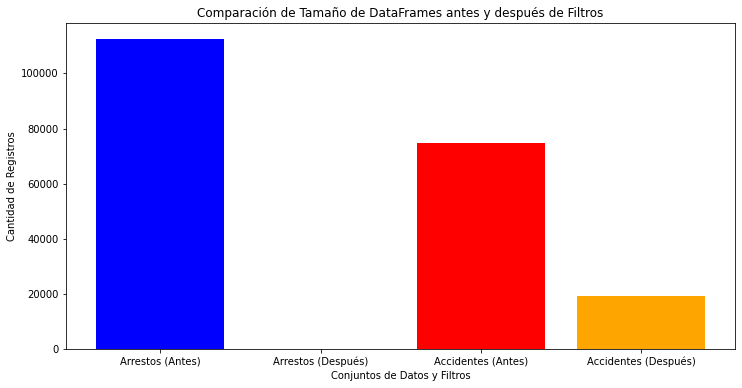

In [0]:
# Cargar los datos de arrestos y accidentes
df_arrestos = pd.read_csv(url_arrestos)
df_accidentes = pd.read_csv(url_accidentes)

# Filtros en el DataFrame de arrestos
# 1. Filtrar arrestos relacionados con drogas (por ejemplo, marihuana)
df_arrestos_drogas = df_arrestos[df_arrestos['PD_DESC'].str.contains("MARIJUANA", case=False, na=False)]

# Filtros en el DataFrame de accidentes
# 1. Filtrar accidentes en los que se desconoce la causa
df_accidentes_desconocidos = df_accidentes[df_accidentes['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unspecified']

# Comparación de tamaños antes y después de los filtros
tamanio_arrestos_antes = len(df_arrestos)
tamanio_arrestos_despues = len(df_arrestos_drogas)

tamanio_accidentes_antes = len(df_accidentes)
tamanio_accidentes_despues = len(df_accidentes_desconocidos)

# Crear una figura para la comparación
plt.figure(figsize=(12, 6))

# Gráfico de barras para mostrar las comparaciones de tamaño
plt.bar(['Arrestos (Antes)', 'Arrestos (Después)', 'Accidentes (Antes)', 'Accidentes (Después)'],
        [tamanio_arrestos_antes, tamanio_arrestos_despues, tamanio_accidentes_antes, tamanio_accidentes_despues],
        color=['blue', 'green', 'red', 'orange'])

plt.xlabel('Conjuntos de Datos y Filtros')
plt.ylabel('Cantidad de Registros')
plt.title('Comparación de Tamaño de DataFrames antes y después de Filtros')

# Mostrar el gráfico
plt.show()

2. Respuesta a preguntas de negocio planteadas: en este apartado se espera que se presenten las tablas y
visuales que responden las preguntas de negocio planteadas con anterioridad, estas respuestas deben
presentar un punto de contacto con el entendimiento de negocio descrito en la primera entrega.

1.	¿Cuáles son las principales causas de accidentes de tráfico en Nueva York y cómo han evolucionado con el tiempo?

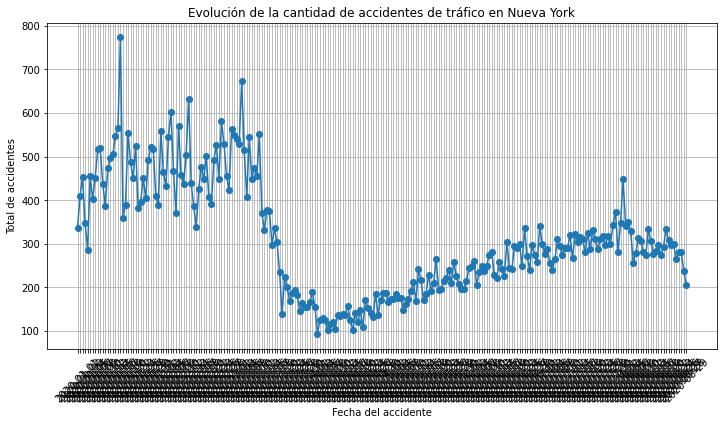

Las 10 principales causas de accidentes de tráfico en Nueva York:
Unspecified                       19471
Driver Inattention/Distraction    19123
Following Too Closely              5202
Failure to Yield Right-of-Way      4815
Passing or Lane Usage Improper     2840
Backing Unsafely                   2829
Passing Too Closely                2687
Other Vehicular                    2233
Unsafe Speed                       2015
Unsafe Lane Changing               1809
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64


In [0]:
# Agrupar los accidentes por la columna 'CRASH DATE' (Fecha del accidente) y contar la cantidad de accidentes
accidentes_por_fecha = df_accidentes.groupby('CRASH DATE').size().reset_index(name='TOTAL_ACCIDENTES')

# Visualizar la evolución de la cantidad de accidentes a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(accidentes_por_fecha['CRASH DATE'], accidentes_por_fecha['TOTAL_ACCIDENTES'], marker='o', linestyle='-')
plt.title('Evolución de la cantidad de accidentes de tráfico en Nueva York')
plt.xlabel('Fecha del accidente')
plt.ylabel('Total de accidentes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Identificar las principales causas de accidentes
principales_causas = df_accidentes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
print("Las 10 principales causas de accidentes de tráfico en Nueva York:")
print(principales_causas)

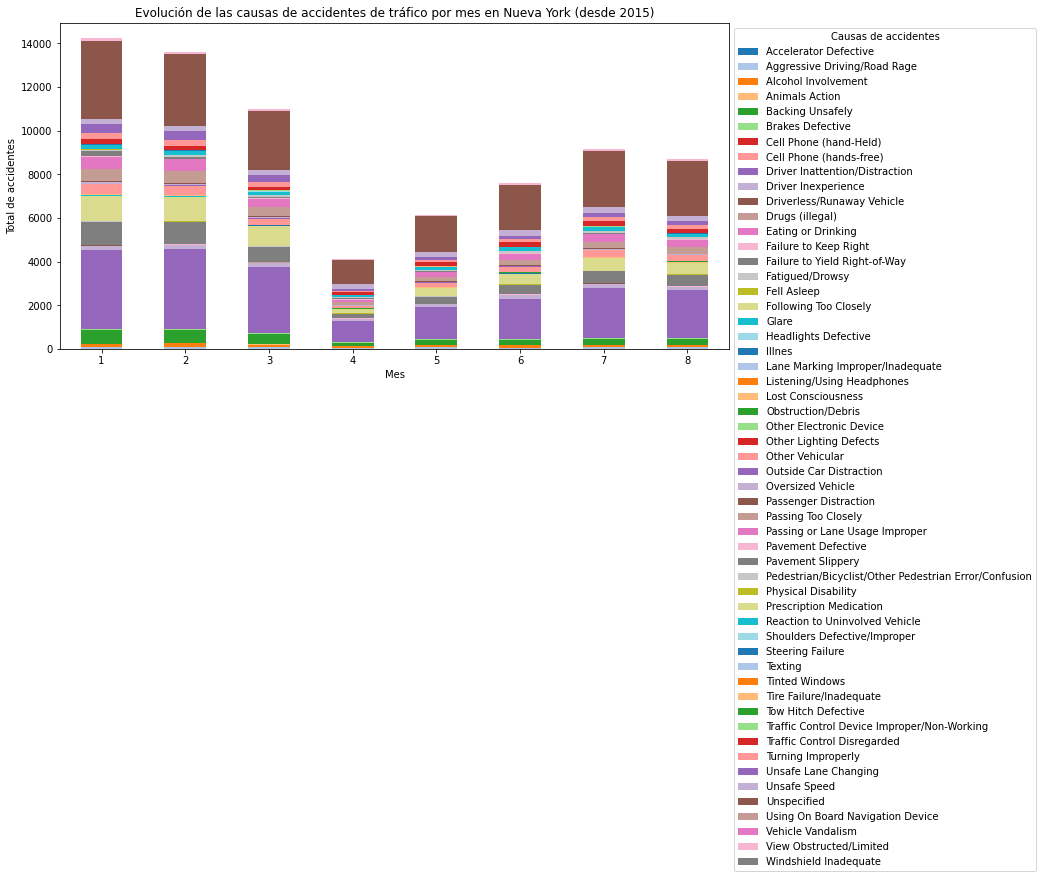

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Agrupar los accidentes por el mes y contar la cantidad de accidentes en cada mes
df_accidentes['CRASH DATE'] = pd.to_datetime(df_accidentes['CRASH DATE'])
df_accidentes['Year'] = df_accidentes['CRASH DATE'].dt.year
df_accidentes['Month'] = df_accidentes['CRASH DATE'].dt.month

# Filtrar los años de interés
df_accidentes_filtrados = df_accidentes[df_accidentes['Year'] >= 2015]

# Crear una tabla pivote para contar la cantidad de accidentes por mes y por causa
tabla_pivote = pd.pivot_table(df_accidentes_filtrados, values='CRASH DATE', index='Month', columns='CONTRIBUTING FACTOR VEHICLE 1', aggfunc='count')

# Seleccionar una paleta de colores
paleta_colores = sns.color_palette("tab20", len(tabla_pivote.columns))

# Visualizar un gráfico de barras apiladas con colores personalizados
tabla_pivote.plot(kind='bar', stacked=True, figsize=(12, 6), color=paleta_colores)
plt.title('Evolución de las causas de accidentes de tráfico por mes en Nueva York (desde 2015)')
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')
plt.legend(title='Causas de accidentes', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)  # Rotar las etiquetas de los meses a posición vertical
plt.show()

2.	¿Existen patrones geográficos en los accidentes de tráfico que sugieran la necesidad de medidas específicas en ciertas áreas?

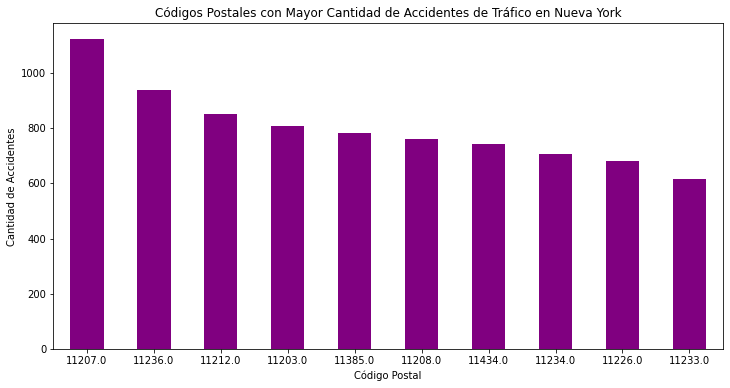

In [0]:
import matplotlib.pyplot as plt

# Filtrar los datos para eliminar registros con valores nulos en ZIP CODE
df_accidentes_geograficos = df_accidentes.dropna(subset=['ZIP CODE'])

# Contar la cantidad de accidentes por código postal
accidentes_por_codigo_postal = df_accidentes_geograficos['ZIP CODE'].value_counts()

# Filtrar los códigos postales con más accidentes (puedes ajustar este número según tu necesidad)
top_codigos_postales = accidentes_por_codigo_postal.head(10)

# Establecer un color púrpura
color_purpura = 'purple'

# Crear un gráfico de barras con barras de color púrpura
plt.figure(figsize=(12, 6))
top_codigos_postales.plot(kind='bar', color=color_purpura)
plt.title('Códigos Postales con Mayor Cantidad de Accidentes de Tráfico en Nueva York')
plt.xlabel('Código Postal')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=0)
plt.show()

3. ¿Cuál es la relación entre los accidentes de tráfico en términos de factores desencadenantes, como el consumo de alcohol?

In [0]:
df_arrestos = pd.read_csv(url_arrestos)
df_accidentes = pd.read_csv(url_accidentes)

# Filtrar arrestos relacionados con el consumo de alcohol
df_arrestos_alcohol = df_arrestos[df_arrestos['PD_DESC'].str.contains("ALCOHOL", case=False, na=False)]

# Filtrar accidentes relacionados con el consumo de alcohol
df_accidentes_alcohol = df_accidentes[df_accidentes['CONTRIBUTING FACTOR VEHICLE 1'].str.contains("ALCOHOL", case=False, na=False)]

# Calcular el tamaño de los DataFrames después de aplicar los filtros
tamanio_arrestos_alcohol = len(df_arrestos_alcohol)
tamanio_accidentes_alcohol = len(df_accidentes_alcohol)

# Calcular la relación entre arrestos y accidentes relacionados con alcohol
relacion_alcohol = tamanio_arrestos_alcohol / tamanio_accidentes_alcohol if tamanio_accidentes_alcohol > 0 else 0

# Imprimir la relación
print("Relación entre arrestos relacionados con alcohol y accidentes relacionados con alcohol:", relacion_alcohol)

Relación entre arrestos relacionados con alcohol y accidentes relacionados con alcohol: 1.6878850102669405


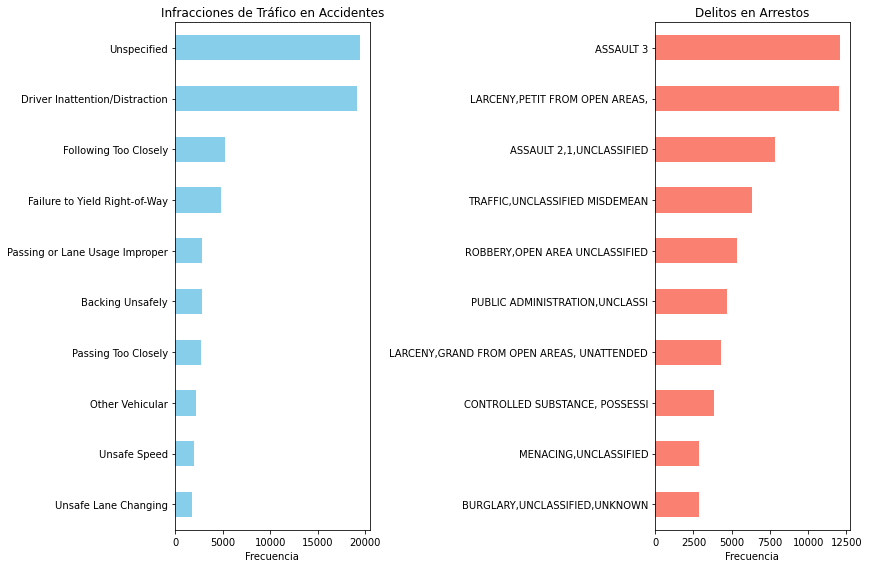

In [0]:
import matplotlib.pyplot as plt

# Cargar los datos de los tres conjuntos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
url_infracciones = "https://raw.githubusercontent.com/K1000T/archivos/main/Motor_Vehicle_Crashes_-_Violation_Information__Three_Year_Window.csv"

df_arrestos = pd.read_csv(url_arrestos)
df_accidentes = pd.read_csv(url_accidentes)
df_infracciones = pd.read_csv(url_infracciones)

# Análisis de infracciones de tráfico en accidentes
infracciones_accidentes = df_accidentes["CONTRIBUTING FACTOR VEHICLE 1"].value_counts().head(10)

# Análisis de delitos en arrestos
delitos_arrestos = df_arrestos["PD_DESC"].value_counts().head(10)

# Crear una segunda gráfica de barras con barras más anchas
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico

plt.subplot(1, 2, 1)
infracciones_accidentes.sort_values().plot(kind="barh", color="skyblue")  # Usar barras horizontales
plt.title("Infracciones de Tráfico en Accidentes")
plt.xlabel("Frecuencia")

plt.subplot(1, 2, 2)
delitos_arrestos.sort_values().plot(kind="barh", color="salmon")  # Usar barras horizontales
plt.title("Delitos en Arrestos")
plt.xlabel("Frecuencia")

plt.tight_layout()
plt.show()

4.	¿Cuáles son los grupos demográficos más propensos a estar involucrados en accidentes de tráfico y arrestos, y cuáles son los factores subyacentes?

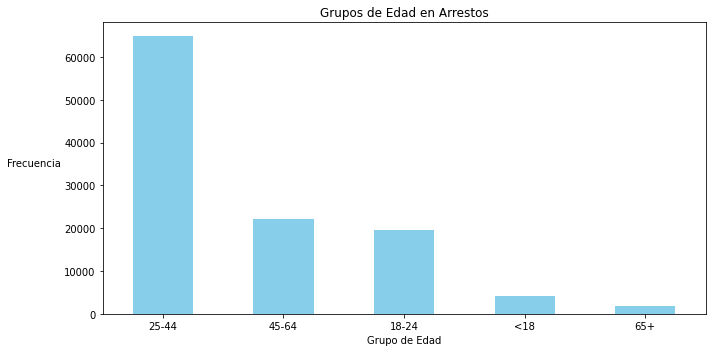

In [0]:
# Gráfico de grupos de edad en arrestos
plt.figure(figsize=(10, 5))
ax = df_arrestos["AGE_GROUP"].value_counts().plot(kind="bar", color="skyblue", rot=0)
plt.title("Grupos de Edad en Arrestos")
plt.xlabel("Grupo de Edad")
ax.set_ylabel("Frecuencia", rotation=0, labelpad=30)
plt.tight_layout()
plt.show()

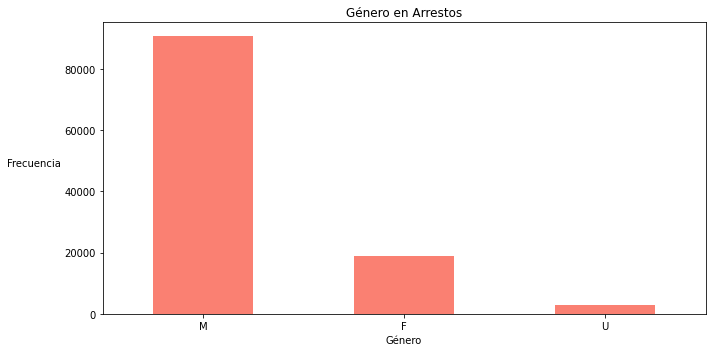

In [0]:
# Gráfico de género en arrestos
plt.figure(figsize=(10, 5))
ax = df_arrestos["PERP_SEX"].value_counts().plot(kind="bar", color="salmon", rot=0)
plt.title("Género en Arrestos")
plt.xlabel("Género")
ax.set_ylabel("Frecuencia", rotation=0, labelpad=30)
plt.tight_layout()
plt.show()

5.	¿Hay una correlación entre la hora del día, el día de la semana o la temporada del año y la incidencia de accidentes de tráfico y arrestos?

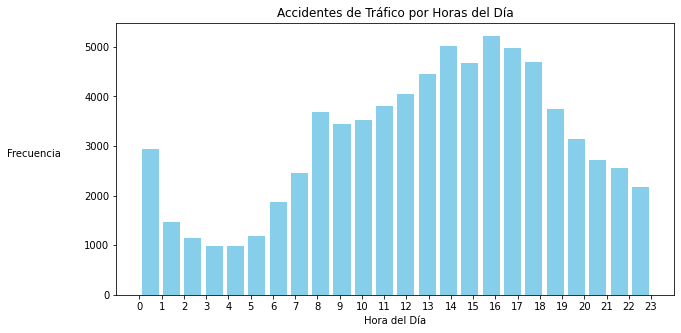

In [0]:
# Convertir la columna 'CRASH TIME' a formato de tiempo
df_accidentes['CRASH TIME'] = pd.to_datetime(df_accidentes['CRASH TIME'])

# Extraer la hora del día de la columna 'CRASH TIME'
df_accidentes['HOUR'] = df_accidentes['CRASH TIME'].dt.hour

# Crear un histograma para analizar la incidencia de accidentes en función de la hora del día
plt.figure(figsize=(10, 5))
df_accidentes['HOUR'].plot(kind='hist', bins=24, rwidth=0.8, color='skyblue')
plt.title("Accidentes de Tráfico por Horas del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Frecuencia", rotation=0, labelpad=50)
plt.xticks(range(0, 24))
plt.show()

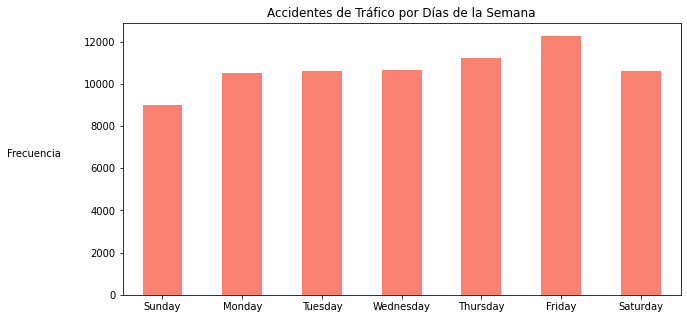

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de accidentes de tráfico
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url_accidentes)

# Convertir la columna 'CRASH DATE' a formato de fecha y hora
df_accidentes['CRASH DATE'] = pd.to_datetime(df_accidentes['CRASH DATE'] + ' ' + df_accidentes['CRASH TIME'])

# Extraer el día de la semana de la columna 'CRASH DATE'
df_accidentes['DAY OF WEEK'] = df_accidentes['CRASH DATE'].dt.day_name()

# Crear un gráfico de barras para analizar la incidencia de accidentes en función del día de la semana
plt.figure(figsize=(10, 5))
ax = df_accidentes['DAY OF WEEK'].value_counts().loc[["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]].plot(kind='bar', color='salmon')
plt.title("Accidentes de Tráfico por Días de la Semana")
plt.ylabel("Frecuencia", rotation=0, labelpad=50)

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

7.	¿Cómo varía la tasa de reincidencia entre las personas arrestadas en comparación con la tasa de reincidencia en accidentes de tráfico? 
¿Existen factores comunes que puedan abordarse para reducir la reincidencia en ambas áreas?

In [0]:
import pandas as pd

# Supongamos que tenemos dos DataFrames: df_arrestos y df_accidentes
# Cargamos datos ficticios para simular la reincidencia en arrestos y accidentes de tráfico
data_arrestos = {
    "ARREST_DATE": ["2023-01-01", "2023-02-15", "2023-03-25", "2023-04-11", "2023-05-03"],
    "AGE_GROUP": ["25-44", "18-24", "45-64", "25-44", "18-24"]
}

data_accidentes = {
    "CRASH DATE": ["2023-01-10", "2023-02-20", "2023-03-30", "2023-04-15", "2023-05-05"],
    "AGE_GROUP": ["25-44", "25-44", "45-64", "25-44", "18-24"]
}

df_arrestos = pd.DataFrame(data_arrestos)
df_accidentes = pd.DataFrame(data_accidentes)

# Calcular la tasa de reincidencia en arrestos
reincidencia_arrestos = df_arrestos["AGE_GROUP"].value_counts() / len(df_arrestos)

# Calcular la tasa de reincidencia en accidentes de tráfico
reincidencia_accidentes = df_accidentes["AGE_GROUP"].value_counts() / len(df_accidentes)

# Comparar las tasas de reincidencia
print("Tasa de reincidencia en arrestos:")
print(reincidencia_arrestos)

print("\nTasa de reincidencia en accidentes de tráfico:")
print(reincidencia_accidentes)

Tasa de reincidencia en arrestos:
25-44    0.4
18-24    0.4
45-64    0.2
Name: AGE_GROUP, dtype: float64

Tasa de reincidencia en accidentes de tráfico:
25-44    0.6
45-64    0.2
18-24    0.2
Name: AGE_GROUP, dtype: float64


<Figure size 720x432 with 0 Axes>

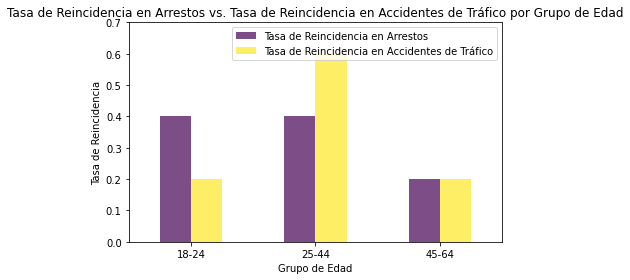

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los resultados
data = {
    'Grupo de Edad': ['18-24', '25-44', '45-64'],
    'Tasa de Reincidencia en Arrestos': [0.4, 0.4, 0.2],
    'Tasa de Reincidencia en Accidentes de Tráfico': [0.2, 0.6, 0.2]
}

df = pd.DataFrame(data)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = df.plot(x='Grupo de Edad', kind='bar', rot=0, colormap='viridis', alpha=0.7)

# Configurar el gráfico
plt.title('Tasa de Reincidencia en Arrestos vs. Tasa de Reincidencia en Accidentes de Tráfico por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Reincidencia')
plt.ylim(0, 0.7)

# Mostrar el gráfico
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

8.	¿Hay alguna evidencia de que ciertos tipos de arrestos están relacionados con accidentes de tráfico?

In [0]:
# Obtener valores únicos en la columna 'AGE_GROUP' (en lugar de 'PD_DESC')
print("Valores únicos en AGE_GROUP (Arrestos):")
print(df_arrestos["AGE_GROUP"].unique())

Valores únicos en AGE_GROUP (Arrestos):
['25-44' '18-24' '45-64']


##**3. Selección de técnicas de aprendizaje de máquina: en este apartado se espera que se seleccione 1**
##**técnica de aprendizaje de máquina supervisado y 1 técnica de aprendizaje de máquina no supervisado,**
##**ue se aplicara sobre los datos que se vienen trabajando. Se espera que se justifique esta selección en**
##**miras del objetivo de negocio del ejercicio.**

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

# Cargar los datos
# (Asumiendo que ya tienes el DataFrame df_accidentes cargado)

# Seleccionar características y variable objetivo
features = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
target = 'PERSONS INJURED'

# Crear la variable objetivo binaria (1 si al menos una persona herida, 0 en caso contrario)
df_accidentes['PERSONS INJURED'] = df_accidentes['NUMBER OF PERSONS INJURED'].apply(lambda x: 1 if x > 0 else 0)

# Filtrar filas con valores faltantes
data = df_accidentes[[*features, target]].dropna()

# Dividir los datos en entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realiza una validación cruzada (por ejemplo, 5 divisiones)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", scores)
print("Precisión promedio:", scores.mean())

# Define la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Realiza una búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Utiliza SelectKBest con la puntuación chi-cuadrado como medida
selector = SelectKBest(k=5)
X_new = selector.fit_transform(X, y)

# Entrena el modelo con las características seleccionadas
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_new, y)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión y generar un informe de clasificación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Precisión del modelo de clasificación:", accuracy)
print("Informe de clasificación:\n", classification_rep)

Puntuaciones de validación cruzada: [1. 1. 1. 1. 1.]
Precisión promedio: 1.0
Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


/databricks/python/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-2813952837677872>:54
     51 clf.fit(X_new, y)
     53 # Hacer predicciones en el conjunto de prueba
---> 54 y_pred = clf.predict(X_test)
     56 # Calcular la precisión y generar un informe de clasificación
     57 accuracy = accuracy_score(y_test, y_pred)

File /databricks/python/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:808, in ForestClassifier.predict(self, X)
    787 def predict(self, X):
    788     """
    789     Predict class for X.
    790 
   (...)
    806         The predicted classes.
    807     """
--> 808     proba = self.predict_proba(X)
    810     if self.n_outputs_ == 1:
    811         return self.classes_.take(np.argmax(proba, axis=1), axis=0)

File /databricks/python/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:850, in ForestClassifier.predict_proba(self, X)
    848 check_is_

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar el conjunto de datos df_accidentes desde un archivo local o URL
# Si estás utilizando Google Colab, puedes cargarlo desde una URL como en tu ejemplo anterior
# df_accidentes = pd.read_csv("ruta/al/archivo/df_accidentes.csv")

# Seleccionar características y variable objetivo
features = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
target = 'PERSONS INJURED'

# Crear la variable objetivo binaria (1 si al menos una persona herida, 0 en caso contrario)
df_accidentes['PERSONS INJURED'] = df_accidentes['NUMBER OF PERSONS INJURED'].apply(lambda x: 1 if x > 0 else 0)

# Filtrar filas con valores faltantes
data = df_accidentes[[*features, target]].dropna()

# Dividir los datos en entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento adicional
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

# Escalar las características
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imputar valores faltantes (si los hay)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Entrenar un modelo de clasificación (por ejemplo, Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión y generar un informe de clasificación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Precisión del modelo de clasificación:", accuracy)
print("Informe de clasificación:\n", classification_rep)

Precisión del modelo de clasificación: 1.0
Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10835
           1       1.00      1.00      1.00      4142

    accuracy                           1.00     14977
   macro avg       1.00      1.00      1.00     14977
weighted avg       1.00      1.00      1.00     14977



In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/K1000T/archivos/main/Motor_Vehicle_Crashes_-_Violation_Information__Three_Year_Window.csv"
df_violations = pd.read_csv(url)

# Crear una nueva columna 'Is_Speeding' basada en 'Violation Description'
df_violations['Is_Speeding'] = df_violations['Violation Description'].str.contains("Speeding", case=False).astype(int)

# Seleccionar las características y la variable objetivo
features = ['Violation Code']
target = 'Is_Speeding'

# Filtrar filas con valores faltantes
data = df_violations[[*features, target]].dropna()

# Convertir 'Violation Code' a valores numéricos usando Label Encoding
label_encoder = LabelEncoder()
data['Violation Code'] = label_encoder.fit_transform(data['Violation Code'])

# Dividir los datos en entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística para predecir Is_Speeding:", accuracy)

Precisión del modelo de regresión logística para predecir Is_Speeding: 0.999937106918239


No supervisado

In [0]:
import pandas as pd
from sklearn.decomposition import PCA

# Cargar los datos desde URL
url = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url)

# Preparar los datos para Análisis de Componentes Principales (PCA) (Aprendizaje No Supervisado)
df_no_supervisado = df_accidentes[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
df_no_supervisado = df_no_supervisado.dropna()

X_no_supervisado = df_no_supervisado

# Aplicar Análisis de Componentes Principales (PCA) (Aprendizaje No Supervisado)
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_no_supervisado = pca.fit_transform(X_no_supervisado)

# Los componentes principales se encuentran en X_no_supervisado

In [0]:
print(X_no_supervisado[:5])  # Imprime los primeros 5 elementos

[[-3.66556941e-01 -1.49217606e-03]
 [ 1.63344168e+00 -3.84311347e-03]
 [ 6.33442368e-01 -2.66764477e-03]
 [-3.66556941e-01 -1.49217606e-03]
 [-3.66556941e-01 -1.49217606e-03]]


Preparación de datos para modelado: este apartado se divide en las siguientes tareas.

- Eliminar caracaterísticas fuertemente correlacionadas: en este apartado se espera
que se calcule la correlación entre las variables y se eliminen aquellas fuertemente
correlacionadas si es el caso.

- Normalización de variables numericas: en este apartado se espera que se realice una
normalziación de datos si es el caso.

Eliminacion

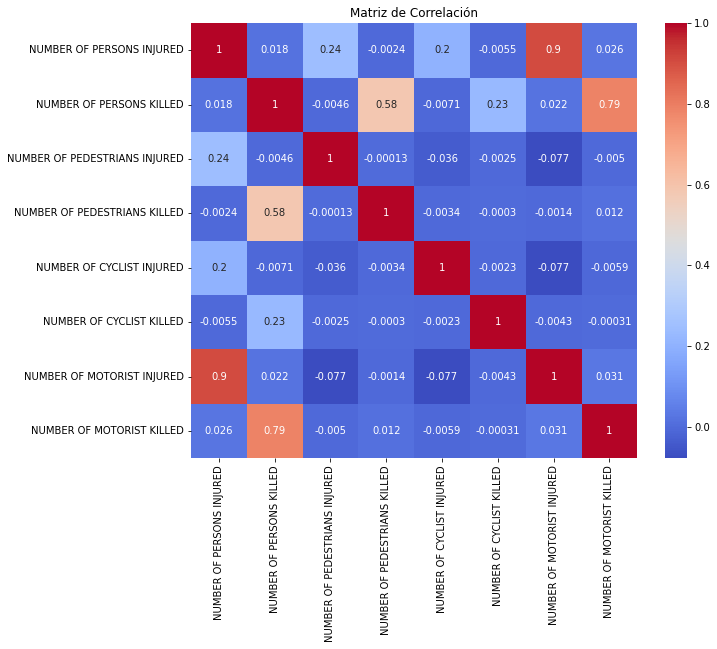

Características eliminadas: ['NUMBER OF MOTORIST INJURED']


<command-1363529521739444>:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos desde URL
url = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url)

# Seleccionar las características relevantes para el análisis de correlación
df_correlation = df_accidentes[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']]

# Calcular la matriz de correlación
correlation_matrix = df_correlation.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Eliminar características altamente correlacionadas (umbral de correlación)
threshold = 0.8 
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

df_accidentes_filtered = df_accidentes.drop(columns=to_drop)

print(f'Características eliminadas: {to_drop}')

In [0]:
# Asegúrate de que las columnas existan en tu DataFrame antes de eliminarlas
columns_to_remove = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']

# Elimina las columnas del DataFrame df_accidentes
df_accidentes = df_accidentes.drop(columns=columns_to_remove)

In [0]:
# Imprime las primeras filas del DataFrame df_accidentes
print(df_accidentes.head())

   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2020-08-29   15:40:00     BRONX   10466.0  40.89210 -73.833760   
1  2020-08-29   21:00:00  BROOKLYN   11221.0  40.69050 -73.919914   
2  2020-08-29   18:20:00       NaN       NaN  40.81650 -73.946556   
3  2020-08-29   00:00:00     BRONX   10459.0  40.82472 -73.892960   
4  2020-08-29   17:10:00  BROOKLYN   11203.0  40.64989 -73.933890   

                     LOCATION   ON STREET NAME CROSS STREET NAME  \
0   POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1  POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2  POINT (-73.946556 40.8165)         8 AVENUE               NaN   
3  POINT (-73.89296 40.82472)              NaN               NaN   
4  POINT (-73.93389 40.64989)              NaN               NaN   

       OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                  NaN  ...                    Unspecified   
1                  NaN  ...                    Unspe

In [0]:
# Genera una nueva matriz de correlación después de eliminar las columnas
correlation_matrix_updated = df_accidentes.corr()

# Imprime la nueva matriz de correlación
print(correlation_matrix_updated)

                               ZIP CODE  LATITUDE  LONGITUDE  \
ZIP CODE                       1.000000 -0.034911   0.014281   
LATITUDE                      -0.034911  1.000000  -0.996476   
LONGITUDE                      0.014281 -0.996476   1.000000   
NUMBER OF PEDESTRIANS INJURED -0.008401  0.001287  -0.002037   
NUMBER OF PEDESTRIANS KILLED   0.006173  0.000566  -0.000745   
NUMBER OF CYCLIST INJURED     -0.037646  0.004776  -0.006129   
NUMBER OF CYCLIST KILLED      -0.003248  0.000197  -0.000595   
NUMBER OF MOTORIST INJURED     0.031041 -0.000767   0.000890   
NUMBER OF MOTORIST KILLED     -0.001309  0.000801  -0.000541   
COLLISION_ID                   0.006582 -0.001673   0.001316   

                               NUMBER OF PEDESTRIANS INJURED  \
ZIP CODE                                           -0.008401   
LATITUDE                                            0.001287   
LONGITUDE                                          -0.002037   
NUMBER OF PEDESTRIANS INJURED          

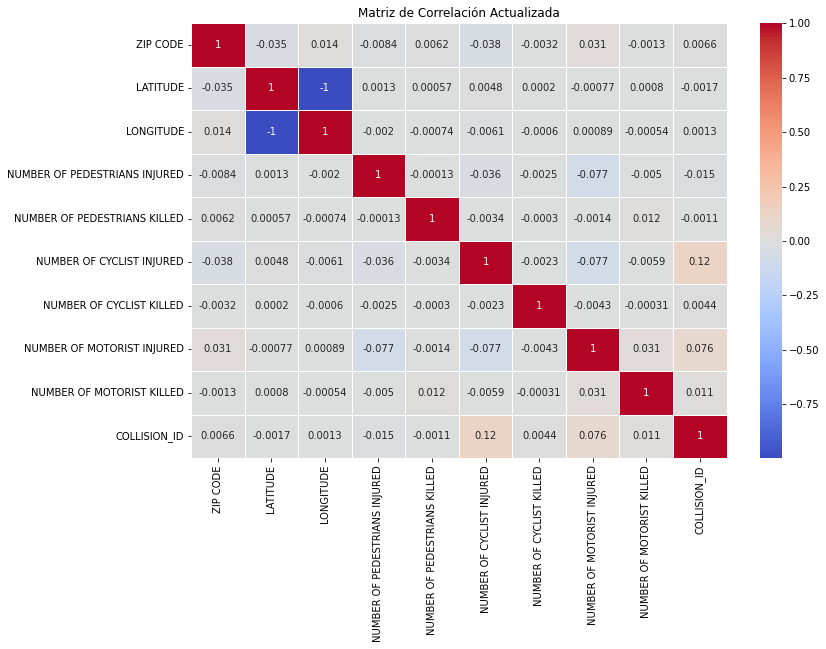

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Genera una nueva matriz de correlación después de eliminar las columnas
correlation_matrix_updated = df_accidentes.corr()

# Crea una gráfica de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación Actualizada")
plt.show()

Normalizar

In [0]:
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas numéricas que deseas normalizar
columns_to_normalize = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                        'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                        'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Normaliza las columnas seleccionadas
df_accidentes[columns_to_normalize] = scaler.fit_transform(df_accidentes[columns_to_normalize])

In [0]:
from sklearn.preprocessing import StandardScaler

# Selecciona las columnas numéricas que deseas normalizar
columns_to_normalize = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                        'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                        'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Normaliza las columnas seleccionadas
df_accidentes[columns_to_normalize] = scaler.fit_transform(df_accidentes[columns_to_normalize])

# Imprime estadísticas básicas antes de la normalización
print("Estadísticas básicas antes de la normalización:")
print(df_accidentes[columns_to_normalize].mean())
print(df_accidentes[columns_to_normalize].std())

# Imprime estadísticas básicas después de la normalización
print("\nEstadísticas básicas después de la normalización:")
print(df_accidentes[columns_to_normalize].mean())
print(df_accidentes[columns_to_normalize].std())

Estadísticas básicas antes de la normalización:
LATITUDE                        -2.473783e-18
LONGITUDE                        4.638344e-18
NUMBER OF PEDESTRIANS INJURED   -5.503596e-18
NUMBER OF PEDESTRIANS KILLED     5.503596e-18
NUMBER OF CYCLIST INJURED       -7.211609e-18
NUMBER OF CYCLIST KILLED        -6.167823e-19
NUMBER OF MOTORIST INJURED       2.429173e-17
NUMBER OF MOTORIST KILLED       -1.708013e-18
COLLISION_ID                     7.287520e-17
dtype: float64
LATITUDE                         1.000007
LONGITUDE                        1.000007
NUMBER OF PEDESTRIANS INJURED    1.000007
NUMBER OF PEDESTRIANS KILLED     1.000007
NUMBER OF CYCLIST INJURED        1.000007
NUMBER OF CYCLIST KILLED         1.000007
NUMBER OF MOTORIST INJURED       1.000007
NUMBER OF MOTORIST KILLED        1.000007
COLLISION_ID                     1.000007
dtype: float64

Estadísticas básicas después de la normalización:
LATITUDE                        -2.473783e-18
LONGITUDE                        